<a href="https://colab.research.google.com/github/peternjathi/matplotlib-projects/blob/main/Mpesa_statement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [24]:
#importing thhe mpesa data and viewing the first 5 rows
df = pd.read_csv("mpesa_statement(1).csv", encoding="ISO-8859-1")
pd.set_option('display.max_rows', None)
df.dtypes


Receipt No.           object
Completion Time       object
Details               object
Transaction Status    object
Paid In               object
Withdrawn             object
Balance               object
dtype: object

In [5]:
df.fillna(0, inplace= True)

To replace the null values(NaN) with Zero.

In [3]:
df.dtypes

Receipt No.           object
Completion Time       object
Details               object
Transaction Status    object
Paid In               object
Withdrawn             object
Balance               object
dtype: object

In [6]:
for index, value in enumerate(df['Paid In']):
 if isinstance(value, str):
    try:
      rounded_value = int(float(value))
      df.at[index, 'paid In'] = rounded_value
    except ValueError:
      print(f'Value at index {index} is not convertible to a float: {value}')
 elif isinstance(value, float):
      df.at[index, 'paid in '] = round(value)




Value at index 11 is not convertible to a float: 6,550.00
Value at index 44 is not convertible to a float: 2,400.00
Value at index 54 is not convertible to a float: 1,200.00
Value at index 88 is not convertible to a float: 10,000.00
Value at index 103 is not convertible to a float: Paid In
Value at index 135 is not convertible to a float: 1,910.00
Value at index 137 is not convertible to a float: 1,000.00
Value at index 157 is not convertible to a float: 1,000.00
Value at index 180 is not convertible to a float: 1,000.00
Value at index 201 is not convertible to a float: 1,000.00
Value at index 217 is not convertible to a float: 12,000.00
Value at index 231 is not convertible to a float: 1,500.00
Value at index 240 is not convertible to a float: 5,000.00
Value at index 243 is not convertible to a float: 1,000.00
Value at index 247 is not convertible to a float: 10,000.00
Value at index 250 is not convertible to a float: 1,000.00
Value at index 259 is not convertible to a float: 2,500.00

In [25]:
row_index = 103
df = df.drop(row_index)

In [26]:
column_to_drop = 'Receipt No.'
df = df.drop(column_to_drop, axis=1)

In [48]:
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(filter(str.isdigit, str(value)))
        return int(cleaned_value)
    except ValueError:
        return None

df['Paid In' ]= df['Paid In'].apply(clean_and_convert)

received_total = df['Paid In'].sum()
print(f'Total Amount Received in a month:{received_total}')

Total Amount Received in a month:756502200000.0


In [46]:
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(filter(str.isdigit, str(value)))
        return int(cleaned_value)
    except ValueError:
        return None

df['Withdrawn' ]= df['Withdrawn'].apply(clean_and_convert)

W_total = df['Withdrawn'].sum()
print(f'Total Amount Received in a month:{W_total}')

Total Amount Received in a month:65258370.0


In [68]:
received_total - W_total

756436941630.0

In [50]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

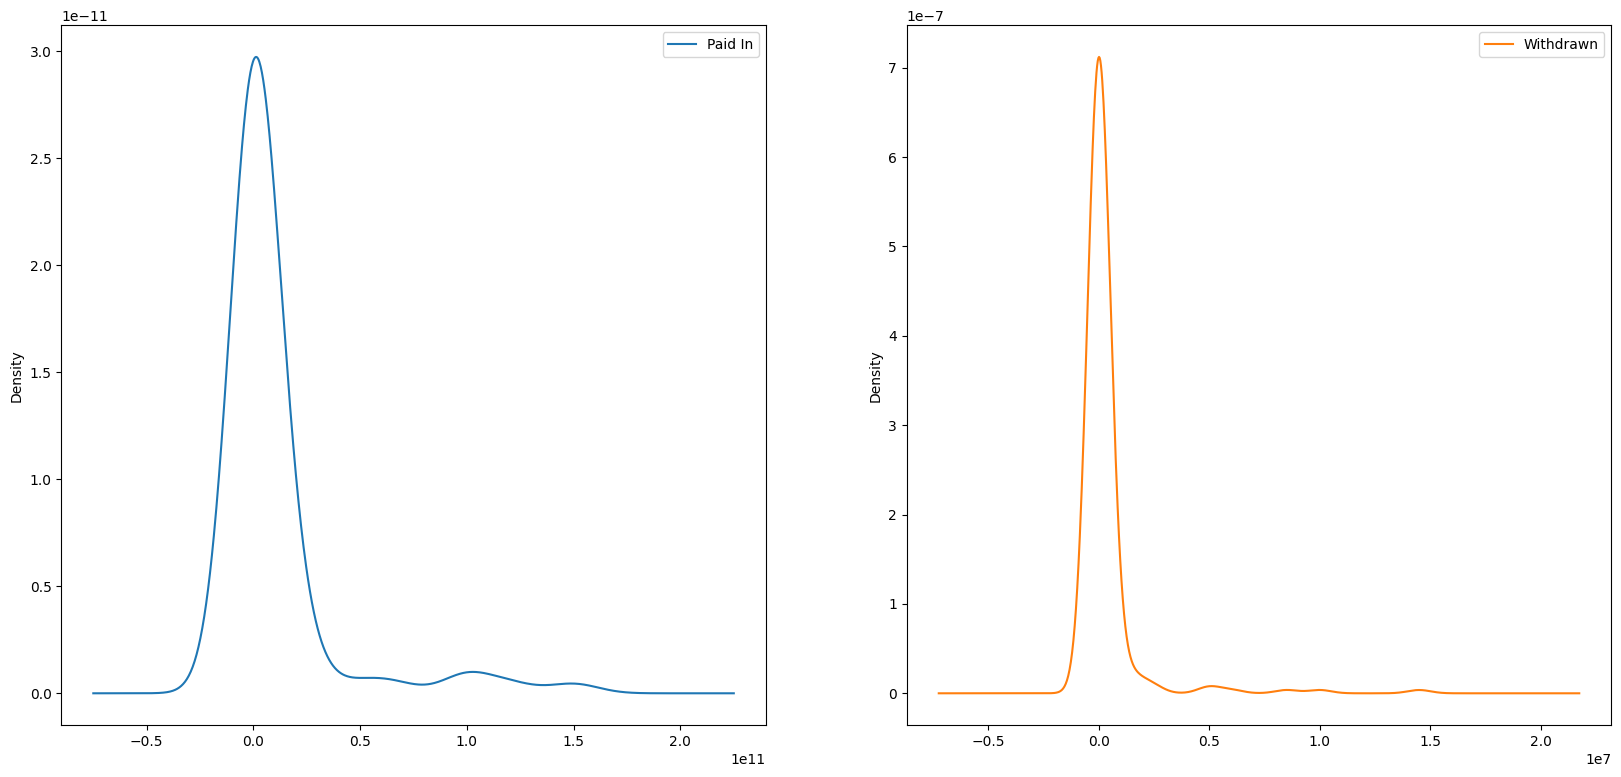

In [84]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show


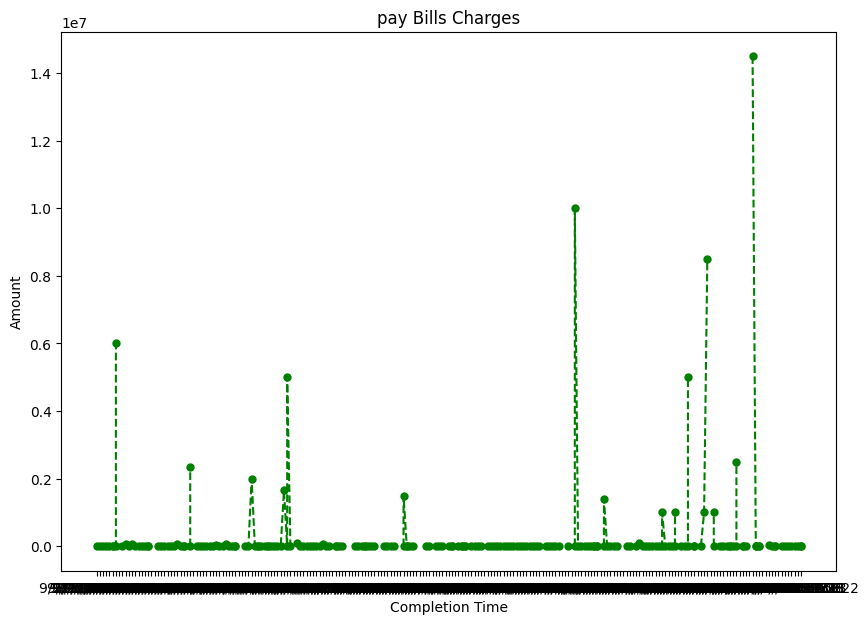

In [82]:
plt.figure(figsize=(10,7))

plt.title('pay Bills Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot(df['Completion Time'],df.Withdrawn,color='green',marker='.',markersize=10,linestyle='--')

In [83]:
df['Withdrawn'].max()

14500000.0

In [65]:
df.dtypes

Completion Time        object
Details                object
Transaction Status     object
Paid In               float64
Withdrawn             float64
Balance                object
dtype: object